In [72]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

plt.style.use("ggplot")

In [26]:
df_canada = pd.read_excel(
    "Canada.xlsx", sheet_name="Canada by Citizenship",
    skiprows=range(20), skipfooter=2
)
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [63]:
df_canada = df_canada.drop(columns=["Type", "Coverage", "AREA", "REG", "DEV"])
df_canada = df_canada.rename(columns={
    "OdName": "country",
    "AreaName": "continent",
    "RegName": "region"
})
df_canada["total"] = df_canada.sum(axis=1)
df_canada = df_canada.set_index("country")
df_canada.index.name = None
df_canada.head()

,continent,region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [17]:
with open("alice_novel.txt","r") as f:
    alice_novel = f.read()

In [18]:
print(alice_novel)

ï»¿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pict

In [19]:
!conda install -c conda-forge wordcloud --yes

Solving environment: ...working... done

# All requested packages already installed.



In [20]:
print ("Wordcloud is installed and imported!")

Wordcloud is installed and imported!


In [21]:
print(STOPWORDS)

{'should', 'and', "you'd", "when's", 'some', 'you', "let's", 'against', "that's", 'who', 'nor', 'after', 'each', 'could', 'ever', 'has', 'the', 'too', 'also', "there's", 'this', 'herself', "it's", 'not', "what's", 'out', "shouldn't", 'she', 'have', "where's", 'until', 'else', "hasn't", 'but', 'than', 'which', 'more', "doesn't", 'yourselves', "why's", 'because', 'those', "he'd", 'under', 'to', "we'd", 'like', 'com', 'be', 'only', "won't", 'our', "i'll", "you've", 'is', 'having', "don't", 'own', 'my', 'am', 'theirs', "i'd", 'most', 'it', 'cannot', 'how', 'her', "she'll", 'both', "here's", "wasn't", "he'll", 'ourselves', "i've", 'no', "couldn't", 'why', 'down', 'by', 'any', "they've", 'was', 'however', 'above', 'just', 'over', 'these', "isn't", 'them', 'where', 'for', 'further', 'www', 'he', 'i', 'his', 'before', 'does', 'an', "can't", "they're", 'in', 'hers', 'hence', 'me', 'therefore', 'your', 'are', 'their', 'about', "weren't", 'again', 'from', 'themselves', "they'll", "we'll", 'can', 

In [29]:
WordCloud

wordcloud.wordcloud.WordCloud

In [30]:
alice_wc = WordCloud(
    background_color="white", 
    max_words=2000,
    stopwords=STOPWORDS
)
alice_wc.generate(alice_novel)

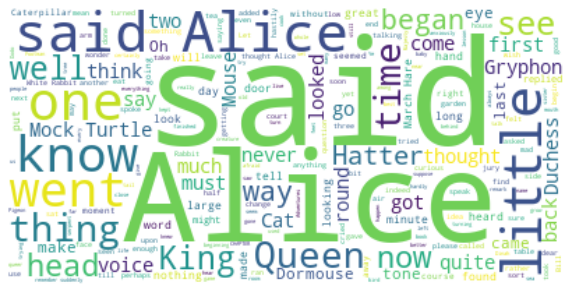

In [39]:
plt.figure(figsize=(10, 6))
plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [40]:
STOPWORDS.add("said")

alice_wc.generate(alice_novel)

plt.figure(figsize=(10, 6))
plt.
plt.axis("off")
plt.show()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [50]:
alice_img = Image.open("alice_mask.png.jpeg")

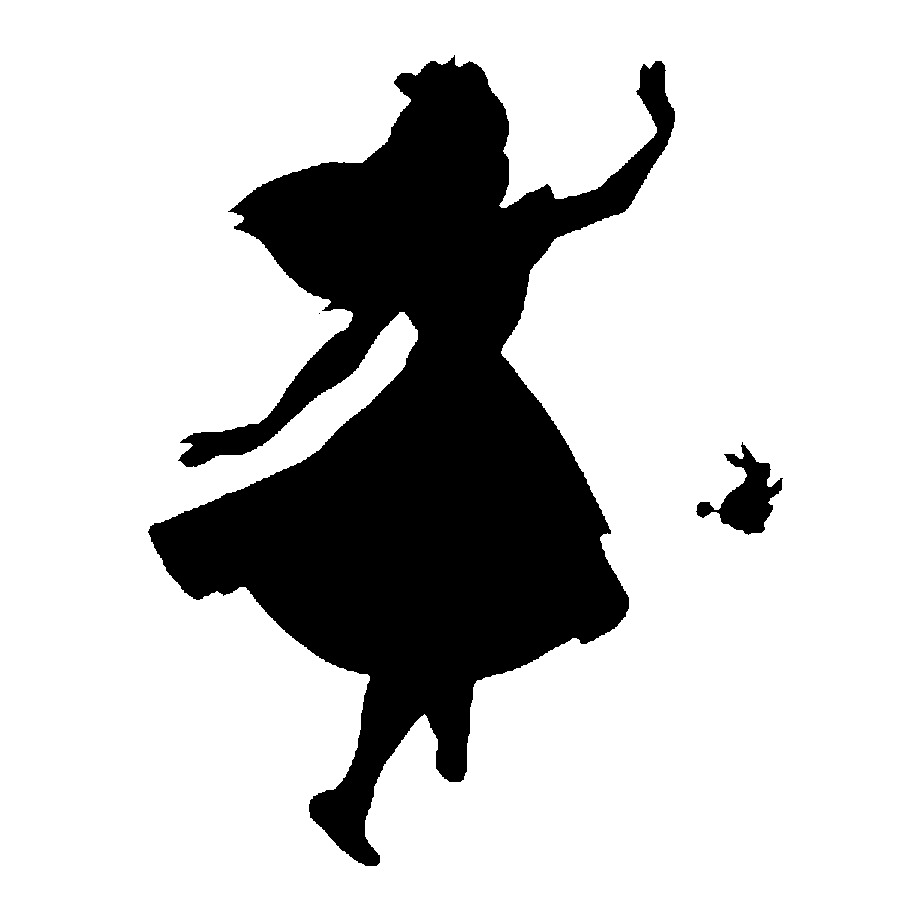

In [51]:
alice_img

In [52]:
alice_mask = np.array(alice_wc)

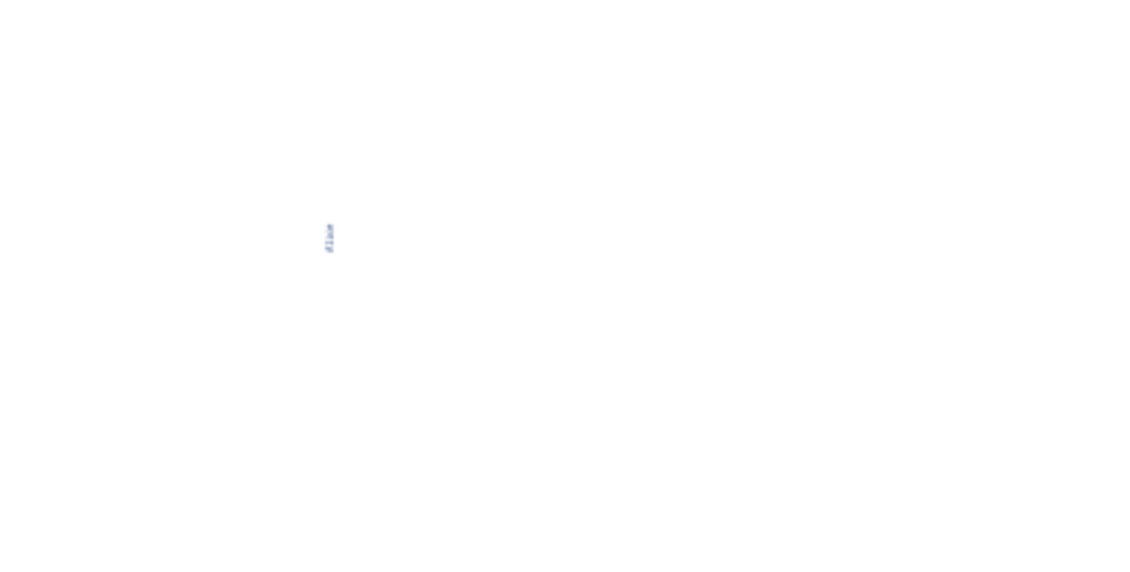

In [55]:
alice_wc = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=STOPWORDS,
    mask=alice_mask
)
alice_wc.generate(alice_novel)

plt.figure(figsize=(20, 20))
plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [66]:
max_words = 900
word_string = ""

for country in df_canada.index.tolist():
    if len(country.split(" ")) == 1:
        num_repeat = int(
            df_canada.loc[country, "total"] / float(df_canada.total.sum()) * max_words
        )
        word_string = word_string + ((country + " ")*num_repeat)
            
print(word_string)

Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Albania Albania Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Argentina Argentina Australia Australia Australia Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Belarus Belgium Brazil Brazil Brazil Brazil Bulgaria Bulgaria Bulgaria Burundi Cameroon Cameroon Chile Chile China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China Colomb

In [ ]:
canada_wc = WordCloud(background_color="white)
canada_wc.generate(word_string)
                      
plt.flight

In [62]:
df_canada

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [67]:
canada_wc = WordCloud(background_color="white")
Canada_wc.generate(word_string)

plt.figure(figsize= 10, 14)
plt.imshow(canada_wc)
plt.axis("off")
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-67-9a1abdf20fe2>, line 4)

In [71]:
!conda install -c conda-forge folium --yes

Solving environment: ...working... done

# All requested packages already installed.



In [73]:
print("folium installed and imported")

folium installed and imported


In [77]:
world_map = folium.Map()
world_map

In [85]:
semarang_map = folium.Map(location=(-6.9932 110.4203), zoom_start=11.5)
semarang_map

SyntaxError: invalid syntax (<ipython-input-85-0cf549ba6ae3>, line 1)

In [80]:
hacktiv8_map = folium.Map(location=(-6.2607187,106.7816162), zoom_start=15)
hacktiv8_map

In [84]:
bandung_map = folium.Map(location=(-6.903429, 107.5030708), zoom_start=13)
bandung_map